# Leer imágenes

El siguiente códido es para aprender a leer imagenes como matrices

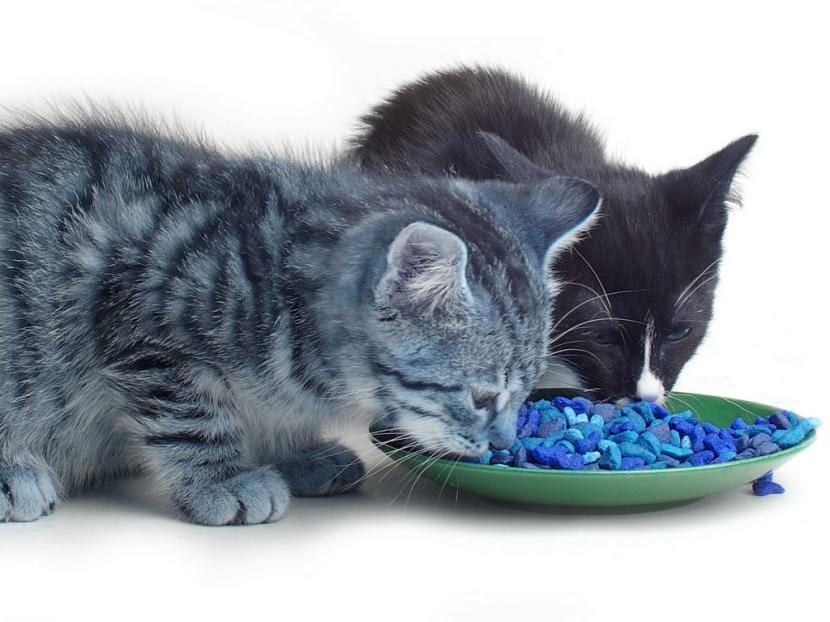

In [ ]:

import math
from cv2 import *
from skimage import io
import numpy as np
from google.colab.patches import cv2_imshow

#img=io.imread("https://upload.wikimedia.org/wikipedia/commons/b/b2/Cube_%28PSF%29.png")
#img = io.imread("http://www.fico-ldtseminar.org/images/alex_poster.png")
img = io.imread("https://www.notigatos.es/wp-content/uploads/2016/07/gatitos_comiendo_pienso.jpg")

imgcopy=img.copy()

cv2_imshow(imgcopy)

## Entiendo las imagenes

Las imagenes son matrices

In [ ]:
imgcopy.shape

(622, 830, 3)

En cada entrada de la imagen hay colores

In [ ]:
imgcopy[300,400]

array([127, 106, 103], dtype=uint8)

El tamaño del la imagen

In [ ]:
imgcopy.shape

(622, 830, 3)

# Manipulación Simple

Poner punto en el centro

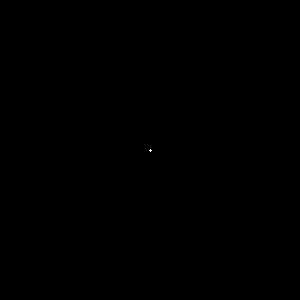

In [ ]:
# Crear una imagen en blanco
size = 700
image = np.zeros((size, size, 3), dtype=np.uint8)

# Poner un punto blanco en el centro
centerx = size // 2
centery = size // 2

# Crear una imagen en blanco
size = 300
image = np.zeros((size, size, 3), dtype=np.uint8)

# Poner un punto blanco en el centro
centerx = size // 2
centery = size // 2

image[centerx,centery] = [255, 255, 255]  # Color blanco
image[centerx+1,centery] = [255, 255, 255]  # Color blanco
image[centerx-1,centery] = [255, 255, 255]  # Color blanco
image[centerx,centery+1] = [255, 255, 255]  # Color blanco
image[centerx,centery-1] = [255, 255, 255]  # Color blanco


# Mostrar la imagen
cv2_imshow(image)





Agregemos una línea en el medio.

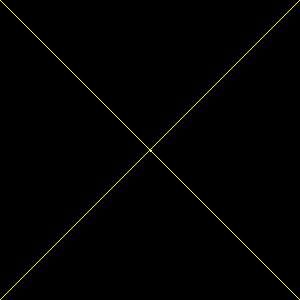

In [ ]:
for t in range(size):
    image[t,t] = np.array([0,254,254])
    image[size-t-1,t] = np.array([0,254,254])

cv2_imshow(image)

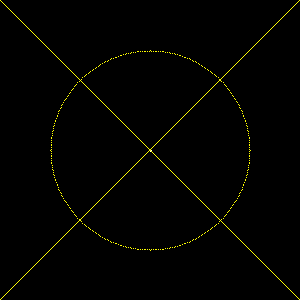

In [ ]:

import math
import numpy as np

r = 100
for v in range(360):
  angle_rad = math.radians(v)
  x = int(r * np.cos(angle_rad)) + size // 2
  y = int(r * np.sin(angle_rad)) + size // 2

  if 0 <= x < size and 0 <= y < size:
    image[x, y] = np.array([0, 254, 254])

cv2_imshow(image)


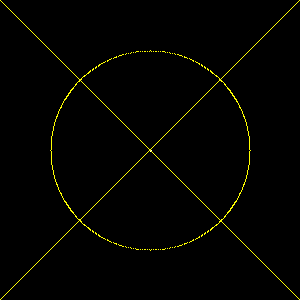

In [ ]:




import math
import numpy as np

k = size//2
h = size//2
r = 100

for m in range (r):
  x = size//2 + m
  # Center the circle by removing the offset
  y = math.sqrt(pow(r,2) - pow(x - (size//2), 2))
  y = int(y)
  # Draw both the upper and lower halves of the circle
  image[x, size//2 + y] = np.array([0,254,254])
  image[x, size//2 - y] = np.array([0,254,254])
  image[-x, size//2 + y] = np.array([0,254,254])
  image[-x, size//2 - y] = np.array([0,254,254])

cv2_imshow(image)

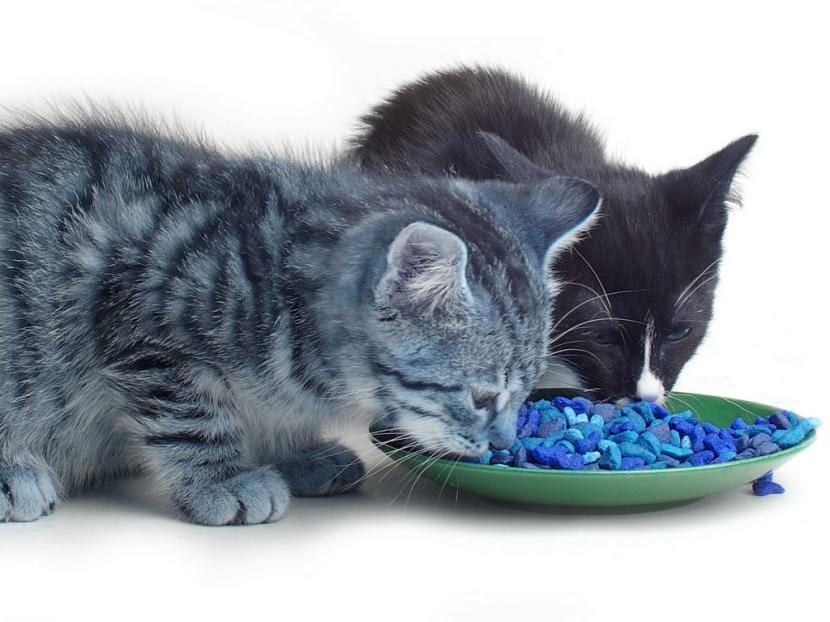

In [ ]:
cv2_imshow(imgcopy)

Ahora manipula la imagen para agregar la otra diagonal

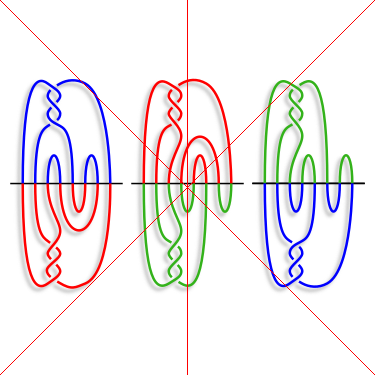

In [ ]:
imgcopy=img.copy()
for t in range(375):
    imgcopy[t,t] = np.array([0,0,254,254])
    imgcopy[t,374-t] = np.array([0,0,254,254])
    imgcopy[t,187] = np.array([0,0,254,254])
cv2_imshow(imgcopy)

Dibujando el círculo

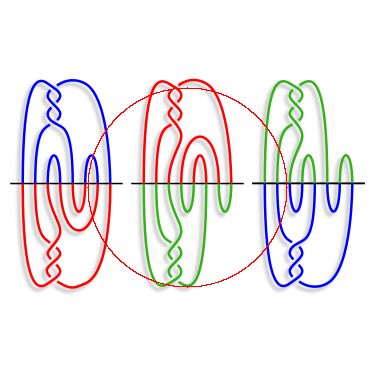

In [ ]:
r =100
imgcopy=img.copy()
n=10000
for t in range(n):
    ang = 2*math.pi*t/n
    #print(10*math.cos(ang), r*math.sin(ang))
    x = 187+math.trunc(r*math.cos(ang))
    y = 187+math.trunc(r*math.sin(ang))
    imgcopy[x,y] = np.array([0,0,254,254])

cv2_imshow(imgcopy)

#Dibuja un marco de 30 pixeles de ancho usando ciclos.

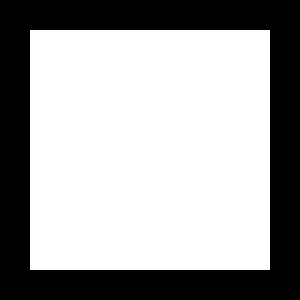

In [ ]:


image = np.ones((300, 300, 3), dtype=np.uint8) * 255
frame_thickness = 30
for i in range(frame_thickness):
    image[i, :] = [0, 0, 0]
    image[-i-1, :] = [0, 0, 0]
    image[:, i] = [0, 0, 0]
    image[:, -i-1] = [0, 0, 0]
cv2_imshow(image)

# `Creando imagen nueva`

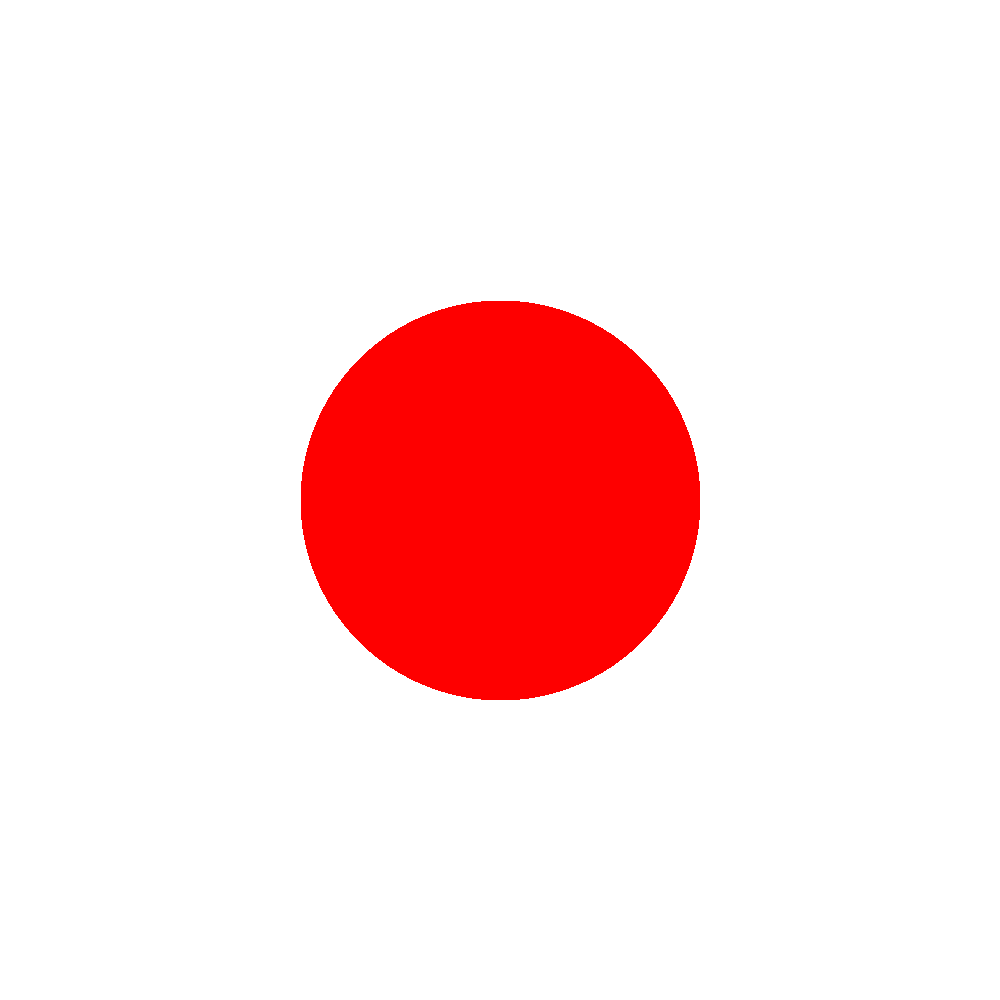

In [ ]:
nueva=np.zeros([1000,1000,4],dtype=np.uint8)

for i in range(1000):
  for j in range(1000):
    d = math.sqrt((i-500)**2 +(j-500)**2)
    if(d < 200):
      nueva[i,j]=np.array([0,0,254,254])

cv2_imshow(nueva)


# Creando anamorfismo cilíndrico

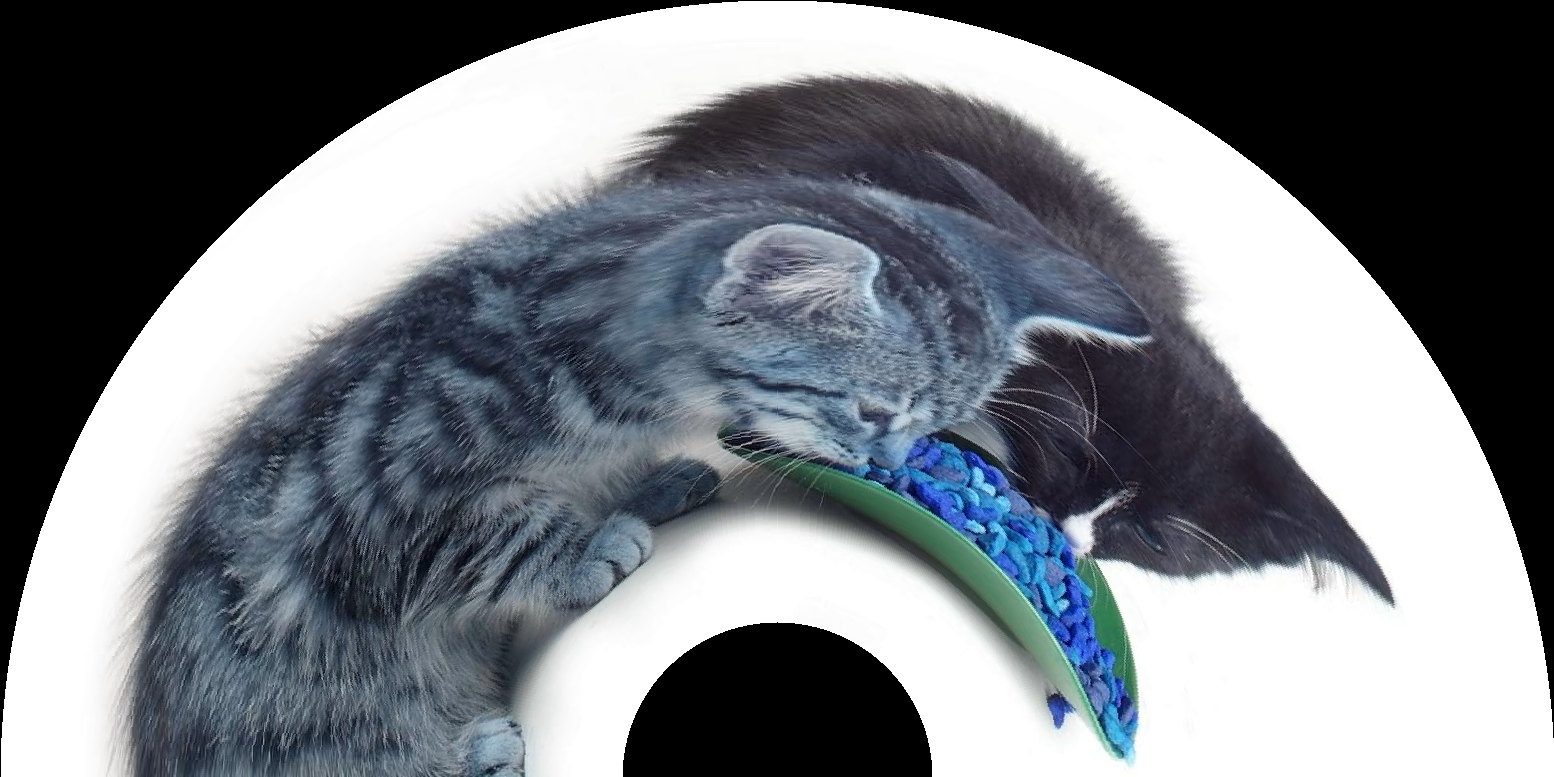

In [ ]:
# Ponemos la imagen original en f y calculamos el tamaño
f=img.copy()
(rows,cols)=f.shape[:2]

# Calculos para hacer determinar el tamaño de la nueva imagen
r=math.trunc(.25*rows) # espacio para poner el cilindro
c=r+rows # en alto de la imagen

# Llena de zeros la matriz
warp=np.zeros([c,2*c,3],dtype=np.uint8)
warp.fill(0)



# Funcion que transforma de polares (R=radio, b = angulo) en la nueva imagen
# en carterianas (x,y) en la imagen orignal
def convt(R,b):
	return (math.trunc((b*cols/(2*math.asin(1)))),math.trunc(c-R))



# Iteramos sobre todos los pixeles de la imagen warp y pintamos
for i in range (0,2*c):
	for j in range (0,c):
    # Calculamos el ángulo del vector que va del centro (c,c) al punto (j,i)
		b=math.atan2(j-c,i-c)

    # Calculamos la norma del vector que va del (c,c) al punto (j,i)
		R=math.sqrt((j-c)**2 + (i-c)**2)

    # Checa si el punto está en el rango adecuado para pintar.
		if R>r and R<c:
      # Convierte
			(q,p)=convt(R,b)
      # Pone el color de la imagen original
			warp[j,i]=f[p-1,q-1]


cv2_imshow(warp)


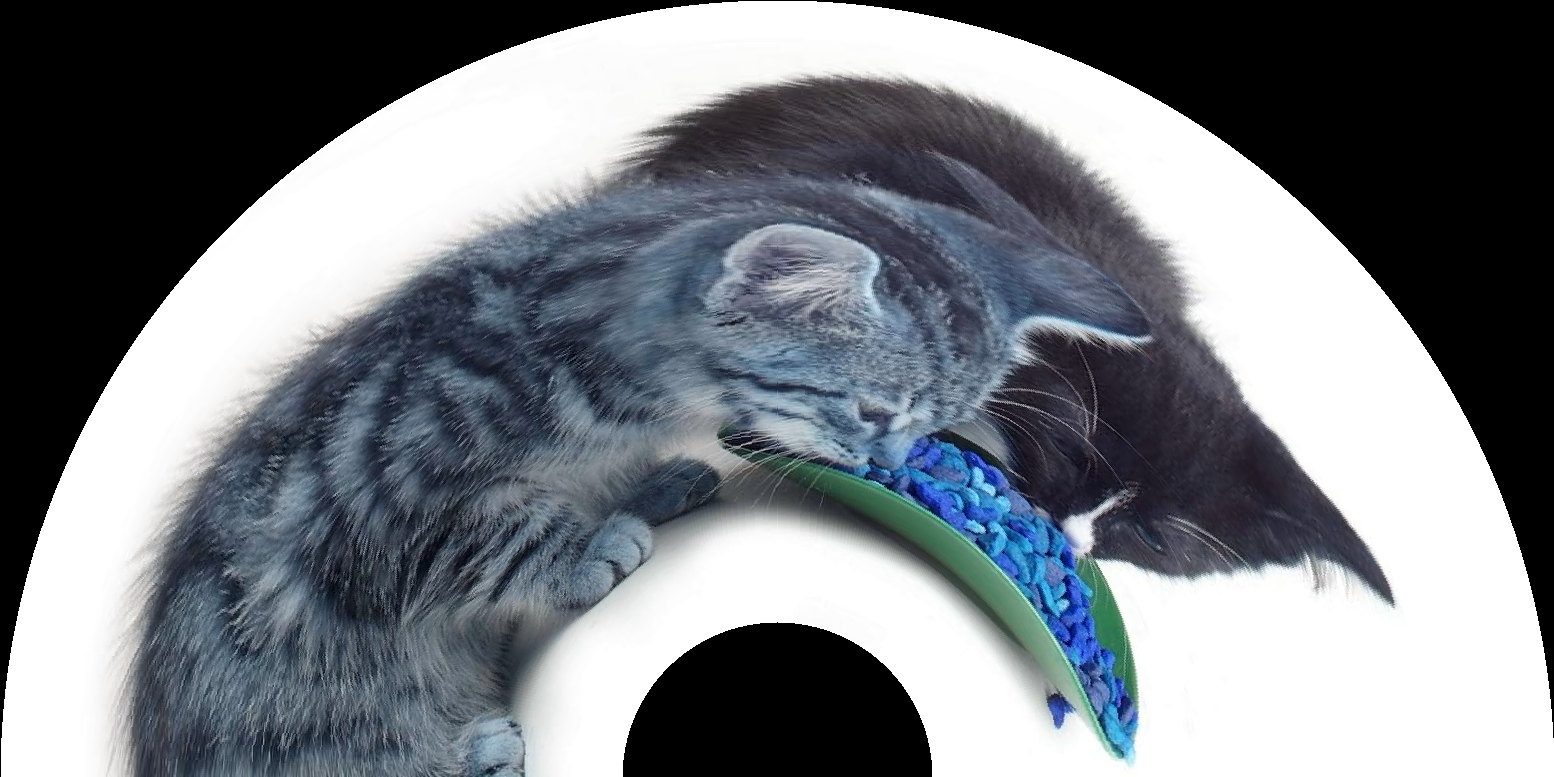

In [ ]:
# Ponemos la imagen original en f y calculamos el tamaño
f=img.copy()
(rows,cols)=f.shape[:2]

# Calculos para hacer determinar el tamaño de la nueva imagen
r=math.trunc(.25*rows) # espacio para poner el cilindro
c=r+rows # en alto de la imagen

# Llena de zeros la matriz, but with 3 channels for RGB
warp=np.zeros([c,2*c,3],dtype=np.uint8) # Change here to 3 channels
warp.fill(0)



# Funcion que transforma de polares (R=radio, b = angulo) en la nueva imagen
# en carterianas (x,y) en la imagen orignal
def convt(R,b):
	return (math.trunc((b*cols/(2*math.asin(1)))),math.trunc(c-R))



# Iteramos sobre todos los pixeles de la imagen warp y pintamos
for i in range (0,2*c):
	for j in range (0,c):
    # Calculamos el ángulo del vector que va del centro (c,c) al punto (j,i)
		b=math.atan2(j-c,i-c)

    # Calculamos la norma del vector que va del (c,c) al punto (j,i)
		R=math.sqrt((j-c)**2 + (i-c)**2)

    # Checa si el punto está en el rango adecuado para pintar.
		if R>r and R<c:
      # Convierte
			(q,p)=convt(R,b)
      # Pone el color de la imagen original
			warp[j,i]=f[p-1,q-1] # Now the shapes should match


cv2_imshow(warp)


#